# Credit Risk project

We are giving you a dataset and asking you to create a model to make predictions.
This assignment is less structured than the previous ones.  It is intended to be similar to what a potential
employer would give you to evaluate your skills.

So: time to show off ! Use the knowledge you have acquired in the first 7 weeks of the course to create a Jupyter notebook that presents your work (and you) in the best light.

As usual, a "correct answer" (e.g., highly predictive model) is only part of the goal.
Your entire research methodology should be evident, as per the "Recipe for ML" we have discussed in class.


# The problem

You are given a dataset of customers who have applied for credit.
Each customer is associated with some number of attributes, and a rating of being a Good/Bad credit risk.

## The dataset

- The dataset is given in the file "credit_data.csv".
- Each row corresponds to one customer.
- There are 20 attributes, some numeric and some categorical.
- The last column "Credit Risk" encodes whether the customer was judged to be a Good/Bad credit risk
    - 1: Good credit risk
    - 2: Bad credit risk

You will use this data to come up with a model that predicts "Credit Risk" for a customer from the customer's attributes.

### Attributes

A description of the attributes is given in the plain text file "credit_data_attributes.txt".

You will notice that the values for many attributes are encoded as strings.
For example, attribute 7 is the customer's Employment Status, having possible values
A71, A72, .., A75.  Per the file, "A71" means the customer is unemployed.

#### Currency

The currency units are "DM" (old German currency: the Deutsche Mark).

As you might guess: this data is not recent; you may find anachronisms other than the currency.

# Your submission

There are some ground rules, mainly to make grading easier for the GA and instructor.

Your `sklearn` model should be stored in the variable `credit_model`; this will allow the GA to apply `sklearn` methods to this variable to evaluate your predictions, e.g.
>`credit_model.predict( ... )`

Your submission must contain a Jupyter notebook in a file named
>LastName_FirstName_MidTerm_Project.ipynb

where `LastName` and `FirstName` should be replaced with your name (as it appears on the class roster).

**IF** your submission consists of files in addition to this one notebook, you can submit a *single* zip file.  This file **must** conform to the following rules:
- The notebook must execute, unchanged, when unzipped into *an arbitrary directory*
    - This means that all paths, e.g., to data files or modules, must be *relative* and not absolute.
    

# Credit Risk Project

**Brief Introduction**: In this project, **Logistic Model** and **Random Forest** are implemented to do the prediction.
- For Logistic Model, categorical features are transformed into **dummy variables** and then one of them are dropped to reduce muti-colinearity
- For Random Forest, **unbalanced data** causes a high misclassified rate for low credit customers, while high accuracy for high credit customers. To deal with this problem, SMOTE method is used

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# 0. Getting the data

### Import data from csv file

In [2]:
Credit_file = "./data/credit_data.csv"
data_train = pd.read_csv(Credit_file)
y = data_train["Credit Risk"] #Get the label for data
data_train.head()

,Attribute 1,Attribute 2,Attribute 3,Attribute 4,Attribute 5,Attribute 6,Attribute 7,Attribute 8,Attribute 9,Attribute 10,...,Attribute 12,Attribute 13,Attribute 14,Attribute 15,Attribute 16,Attribute 17,Attribute 18,Attribute 19,Attribute 20,Credit Risk
0,A11,6,A34,A43,1169,A65,A75,4,A93,A101,...,A121,67,A143,A152,2,A173,1,A192,A201,1
1,A12,48,A32,A43,5951,A61,A73,2,A92,A101,...,A121,22,A143,A152,1,A173,1,A191,A201,2
2,A14,12,A34,A46,2096,A61,A74,2,A93,A101,...,A121,49,A143,A152,1,A172,2,A191,A201,1
3,A11,42,A32,A42,7882,A61,A74,2,A93,A103,...,A122,45,A143,A153,1,A173,2,A191,A201,1
4,A11,24,A33,A40,4870,A61,A73,3,A93,A101,...,A124,53,A143,A153,2,A173,2,A191,A201,2


From the documentation of the data, we can see that there are 13 qulitative features and 7 numerical features. However,although "Attribute Age" is a numerical feature. I want to transfer into bucket, which might improve the performance of the models

# 1. Exploring data

In [3]:
f = open("./data/credit_data_attributes.txt", "r")
print("The explaination of the Attributes are shown below:\n")
print(f.read())

The explaination of the Attributes are shown below:

Attribute 1:  (qualitative)
	       Status of existing checking account
               A11 :      ... <    0 DM
	       A12 : 0 <= ... <  200 DM
	       A13 :      ... >= 200 DM /
		     salary assignments for at least 1 year
               A14 : no checking account

Attribute 2:  (numerical)
	      Duration in month

Attribute 3:  (qualitative)
	      Credit history
	      A30 : no credits taken/
		    all credits paid back duly
              A31 : all credits at this bank paid back duly
	      A32 : existing credits paid back duly till now
              A33 : delay in paying off in the past
	      A34 : critical account/
		    other credits existing (not at this bank)

Attribute 4:  (qualitative)
	      Purpose
	      A40 : car (new)
	      A41 : car (used)
	      A42 : furniture/equipment
	      A43 : radio/television
	      A44 : domestic appliances
	      A45 : repairs
	      A46 : education
	      A47 : (vacation - does not exi

In [4]:
data_train.describe()

,Attribute 2,Attribute 5,Attribute 8,Attribute 11,Attribute 13,Attribute 16,Attribute 18,Credit Risk
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,20.903000,3271.258000,2.973000,2.845000,35.546000,1.407000,1.155000,1.300000
std,12.058814,2822.736876,1.118715,1.103718,11.375469,0.577654,0.362086,0.458487
min,4.000000,250.000000,1.000000,1.000000,19.000000,1.000000,1.000000,1.000000
25%,12.000000,1365.500000,2.000000,2.000000,27.000000,1.000000,1.000000,1.000000
50%,18.000000,2319.500000,3.000000,3.000000,33.000000,1.000000,1.000000,1.000000
75%,24.000000,3972.250000,4.000000,4.000000,42.000000,2.000000,1.000000,2.000000
max,72.000000,18424.000000,4.000000,4.000000,75.000000,4.000000,2.000000,2.000000


In [5]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
Attribute 1     1000 non-null object
Attribute 2     1000 non-null int64
Attribute 3     1000 non-null object
Attribute 4     1000 non-null object
Attribute 5     1000 non-null int64
Attribute 6     1000 non-null object
Attribute 7     1000 non-null object
Attribute 8     1000 non-null int64
Attribute 9     1000 non-null object
Attribute 10    1000 non-null object
Attribute 11    1000 non-null int64
Attribute 12    1000 non-null object
Attribute 13    1000 non-null int64
Attribute 14    1000 non-null object
Attribute 15    1000 non-null object
Attribute 16    1000 non-null int64
Attribute 17    1000 non-null object
Attribute 18    1000 non-null int64
Attribute 19    1000 non-null object
Attribute 20    1000 non-null object
Credit Risk     1000 non-null int64
dtypes: int64(8), object(13)
memory usage: 164.1+ KB


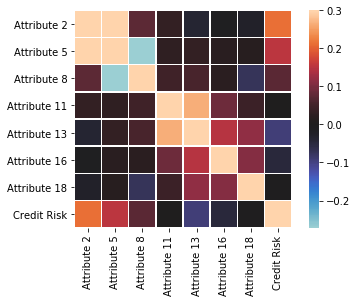

In [6]:
import seaborn as sns
_ = sns.heatmap(data_train.corr(), vmax=.3, center=0, square=True, linewidths=.5)

The correlation between is not high. Thus we don't need to reduce correlation by using method including PCA

In [7]:
def plot_attrs(df, attrs, attr_type="Cat", normalize=True, plot=True):
    """
    Plot/print the distribution of one or more attributes of DataFrame
    
    Parameters
    ----------
    df: DataFrame
    attrs: List of attributes (i.e., column names)
    
    Optional
    --------
    attr_type: String; 
      "Cat" to indicate that the attributes in attrs are Categorical (so use value_counts)
      Otherwise: the attributes must be numeric columns (so use histogram)
    """
    num_attrs = len(attrs)
    ncols=2
    nrows = max(1,round(num_attrs/ncols))
    if num_attrs==1:
        fig, axes = plt.subplots(nrows=nrows, ncols=1, figsize=(4, num_attrs*3))
    else:
        fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(ncols*4, num_attrs*3))
    # Make sure axes is an array (special case when num_attrs==1)
    if num_attrs == 1:
        axes =np.array( [ axes ])
        
    for i, attr in enumerate(attrs):
        if attr_type == "Cat":
            alpha_bar_chart = 0.55
            plot_data = df.loc[:, attr ].value_counts(normalize=normalize).sort_index()
            
            args = { "kind":"bar" } #, "alpha":alpha_bar_chart}
            kind="bar"
        else:
            plot_data = df.loc[:, [attr] ]
            
            args = { "kind":"hist"}
            if normalize:
                args["density"] = True
            kind="hist"
            
        if plot:
            _ = plot_data.plot(title=attr, ax=axes.flatten()[i], **args)
        else:
            print(attr + "\n")
            print(plot_data)
            print("\n")

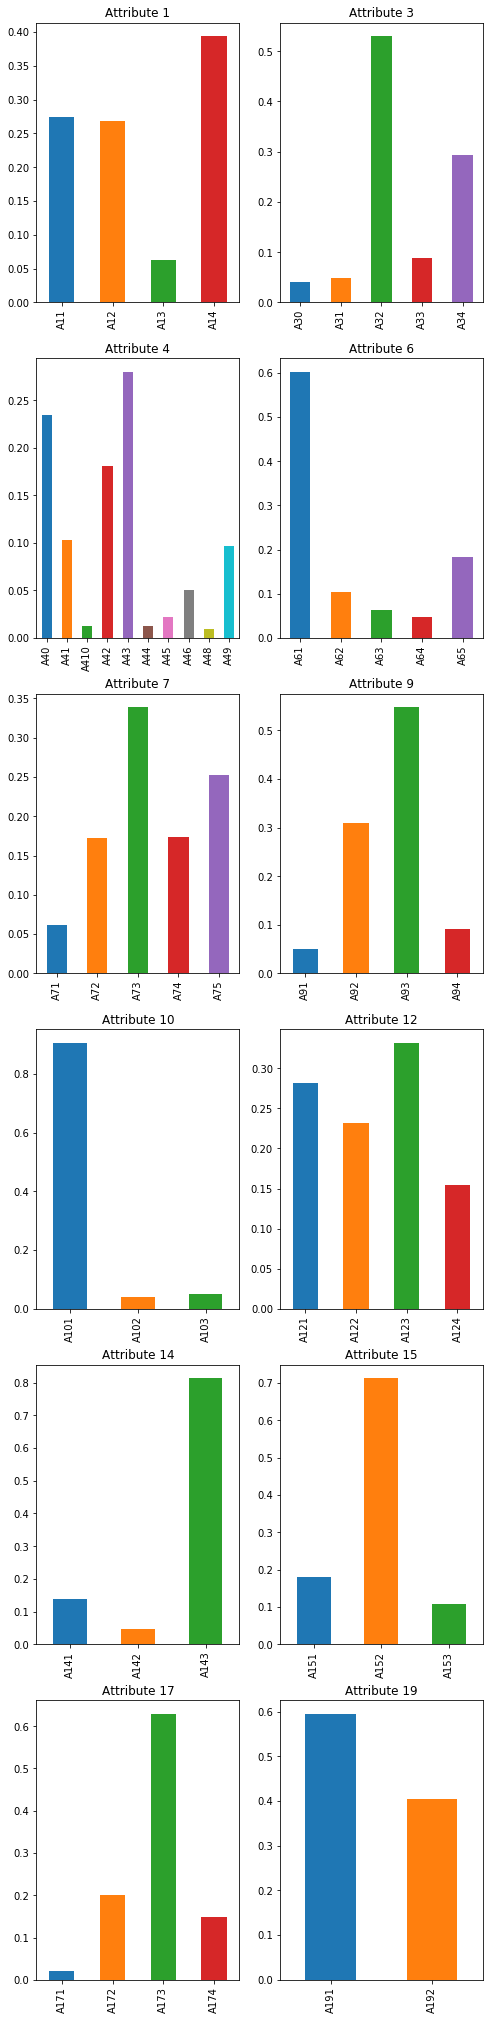

In [8]:
plot_attrs(data_train, [ "Attribute 1", "Attribute 3", "Attribute 4","Attribute 6","Attribute 7","Attribute 9",
                "Attribute 10","Attribute 12","Attribute 14","Attribute 15","Attribute 17","Attribute 19"], attr_type="Cat", plot=True)

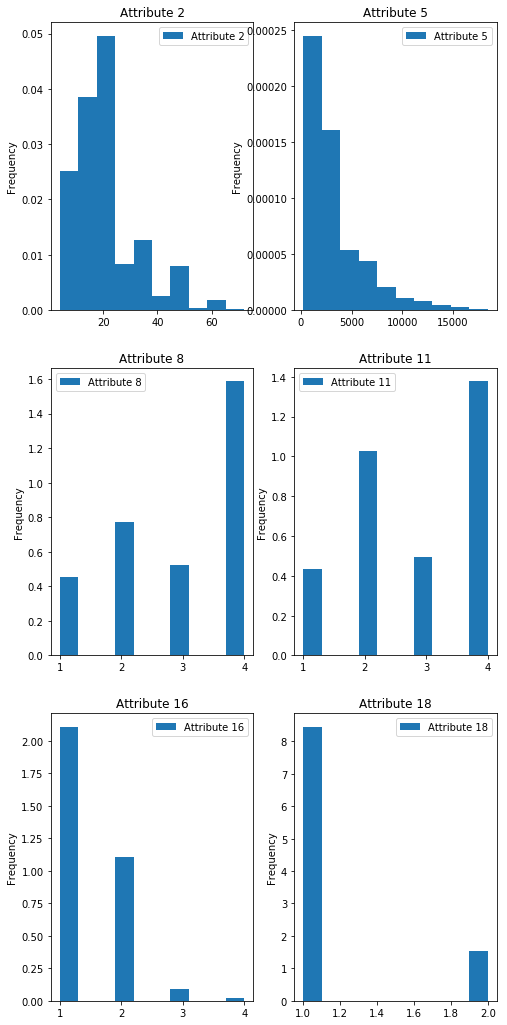

In [9]:
plot_attrs(data_train, ["Attribute 2","Attribute 5","Attribute 8","Attribute 11","Attribute 16","Attribute 18"], attr_type="Num")


# 2. Making pipeline and prepocessing of data

### 2.1 Pipelines

**Three main pipelines:**
- Numerical pipeline
- Categorical pipeline
- Agebucket pipeline


Create several base pipelines:
- `DataFrameSelector`: select several columns of data, return DataFrame (input:DataFrame,output: DataFrame)
- `DataFramSelector_toarray`: select several columns of data and transform and return an array (input:DataFrame,output: array)
- `strtoint`: transform Categorical data into int by Removing A from every string (input:DataFrame,output: array)
- `todummy_drop`: utilize OneHotEncoder to transform  "int" form categorical data into several dummy variables and drop the first column of each set of dummy varaibles (input:array,output: array)


In [10]:
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import Pipeline
try:
    from sklearn.impute import SimpleImputer # Scikit-Learn 0.20+
except ImportError:
    from sklearn.preprocessing import Imputer as SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import FeatureUnion

#Select the data
class DataFrameSelector(BaseEstimator, TransformerMixin):
    def __init__(self, attribute_names):
        self.attribute_names = attribute_names
    def fit(self, X, y=None):
        return self
    def transform(self, X):                            
        return X[self.attribute_names]

class DataFrameSelector_toarray(BaseEstimator, TransformerMixin):
    def __init__(self, attribute_names):
        self.attribute_names = attribute_names
    def fit(self, X, y=None):
        return self
    def transform(self, X):                            
        return X[self.attribute_names].values
    
class strtoint(BaseEstimator, TransformerMixin):
    def fit(self,X,y = None):
        return self
    def transform(self,X):
        temp = X.values
        for i,item_1 in enumerate(temp):
            for j,item_2 in enumerate(item_1):
                temp[i][j] = int(item_2[1:])
        return temp
    
class todummy_drop(BaseEstimator, TransformerMixin):
    def fit(self,X,y = None):
        return self
    def transform(self,X):
        temp = X.T
        res = np.delete(OneHotEncoder(sparse=False,categories='auto').fit_transform(temp[0].T.reshape(-1,1)),0,1) 
        for i,item in enumerate(temp[1:]):
            dm_0 = np.delete(OneHotEncoder(sparse=False,categories='auto').fit_transform(temp[i].T.reshape(-1,1)),0,1)
            res =np.concatenate((res,dm_0),axis = 1)
        return res

class Age_bucket(BaseEstimator, TransformerMixin):
    def __init__(self, n):# n is interval length for each bucket
        self.n = n
    def fit(self, X, y=None):
        return self
    def transform(self, X):
        X = X.values

        max_0,min_0 = int(X.max()),int(X.min())
        len_0 = self.n
        bkt_num = np.floor((max_0-min_0+1)/ len_0)    #determine how many buckets according to max and min age

        if  ((max_0-min_0+1) % len_0) != 0 :
            bkt_num+=1                     #if there are remainder, bucket number+1
            
        print("Transform age into {t} buckets and {m} dummy variables".format(t = bkt_num, m=bkt_num-1))
        
        j = 0
        while(j<bkt_num):
            for i,item in enumerate(X):
                if (j*len_0+min_0)<= int(item) and  int(item) <(j+1)*len_0+min_0:

                    X[i]=j
            j +=1
        
        return X
    
features_age = ["Attribute 13"]
age_pipeline = Pipeline([
        ("select_numeric", DataFrameSelector( features_age )), #set the parameter for DataDrameSelector
        ("Agebucket",  Age_bucket(n =10)),
        (" todummy_drop",  todummy_drop())
  
    ])
    
cat_features = ["Attribute 1", "Attribute 3", "Attribute 4","Attribute 6","Attribute 7","Attribute 9",
                "Attribute 10","Attribute 12","Attribute 14","Attribute 15","Attribute 17","Attribute 19","Attribute 20"]
cat_pipeline = Pipeline([
        ("select_cat", DataFrameSelector( cat_features )), #set the parameter for DataDrameSelector
        ("strtoint", strtoint()),         #set the parameter for SimpleImputer, Use median for the missing value
        ("todummy_drop",todummy_drop())
    ])

num_features=["Attribute 2","Attribute 5","Attribute 8","Attribute 11","Attribute 16","Attribute 18"]
num_pipeline = Pipeline([
        ("select_numeric", DataFrameSelector_toarray( num_features )), #set the parameter for DataDrameSelector
    ])
    
preprocess_pipeline_logistic = FeatureUnion(transformer_list=[
        ("num_pipeline", num_pipeline),
        ("cat_pipeline", cat_pipeline),
        ("age_pipeline", age_pipeline)
    ])

In [11]:
X = preprocess_pipeline_logistic.fit_transform(data_train)

Transform age into 6.0 buckets and 5.0 dummy variables


### 2.2 Training set and Testing set

Spliting data set into two
- Training set: size of 700
- Testing set: size of 300
- Futhermore, Training set is divided into 5, using cross validation. This will help us to determine what is the best parameter in models(especially for `Random Forest` to find optimal `n_estimators` and `max_depth`) 

In [12]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state=1)

In [13]:
X.shape

(1000, 54)

# 3. Logistic Model 

### Logistic Model with unbalanced data

In Logistic Model, wen need to transform categorical data into dummy variables. After that, one of the dummy variables need to be dropped to eliminate colinearity. Utilizing the pipeline above, there are 54 features in logistic model after transformation.

### 3.1 Using cross validation

Cross Validation is used here to evaluate the performance of logistic model

In [14]:
from sklearn import linear_model, preprocessing, model_selection
from sklearn.model_selection import cross_val_score
logistic_clf_1 = linear_model.LogisticRegression(solver='liblinear')
SCORE_1 = cross_val_score(logistic_clf_1, X_train, y_train, cv=5, scoring="accuracy")
SCORE_1 = SCORE_1.mean()
SCORE_1

0.755790820231353

In [15]:
print("{s}: Accuracy = {a:.4f}".format(s="Logistic Model  ", a=SCORE_1.mean()))

Logistic Model  : Accuracy = 0.7558


### 3.2 Fiting model and predit on the testing set

I also try the method without using Cross validation. Just to compare the result with other model below.

In other words, I use training set to train the data and testing set to evaluate the data

In [16]:
logistic_clf_2 = linear_model.LogisticRegression(solver='liblinear')
logistic_clf_2.fit(X_train,y_train)
print("On the training set, the accuracy is {t:.4f}".format(t = logistic_clf_2.score(X_train,y_train)))
print("On the testing set, the accuracy is {t:.4f}".format(t = logistic_clf_2.score(X_test,y_test)))

On the training set, the accuracy is 0.7943
On the testing set, the accuracy is 0.7633


**Conclusion: The accuracy of cross validation and testing set are similar to each other as expected**

### 3.3 Confusion Matrics

**We can't only focus on the accuracy.**

In this case, **a poor credit customer classfied as good credit one** is very undesirable. We will lose a lot of money if  a large amount of poor credit customers are classified as good credit ones.

In [17]:
from sklearn.model_selection import cross_val_predict
from sklearn import datasets, svm, metrics
from sklearn.metrics import precision_recall_curve
expected_1 = y_train
predicted_1 = cross_val_predict(logistic_clf_1, X_train, y_train, cv=5)
confusion_mat_L_1 = metrics.confusion_matrix(expected_1, predicted_1)

In [18]:
# %load mnist_plot_confusion.py
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        # Normalize by row sums
        cm_pct = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        cm = np.around( 100 * cm_pct, decimals=0).astype(int)
        
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    fmt = 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        # Plot coordinate system has origin in upper left corner
        # -  coordinates are (horizontal offset, vertical offset)
        # -  so cm[i,j] should appear in plot coordinate (j,i)
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()


Confusion matrix, without normalization


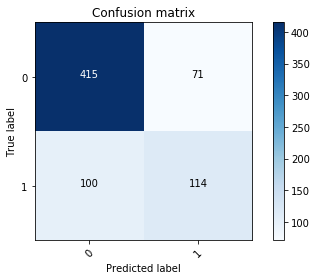

In [19]:
plot_confusion_matrix(confusion_mat_L_1, range(2))

In [20]:
t1 = confusion_mat_L_1[0][0]/(confusion_mat_L_1[0][0]+confusion_mat_L_1[0][1])
t2 = confusion_mat_L_1[1][1]/(confusion_mat_L_1[1][1]+confusion_mat_L_1[1][0])
print("Given good credit customer,prediction accuracy is {t1}".format(t1 =t1))
print("Given poor credit customer,prediction accuracy(Precision) is {t2}".format(t2 =t2))

Given good credit customer,prediction accuracy is 0.8539094650205762
Given poor credit customer,prediction accuracy(Precision) is 0.5327102803738317


**Discussion**: These accuracy above are just very bad in practice. We don't want to see so many **poor credit people classified as qualified customers**, which may bring **huge loss** if the company lend money to them base on this prediction.

I guess this result is because of the **unbalanced data**. There are more people with good credit in our sample as shown below

In [21]:
y_train.value_counts()

1    486
2    214
Name: Credit Risk, dtype: int64

**Good credit people are far more that the poor credit ones!** 

For the data in the training set, And this  ratio is around 7:3. **The unbalanced data might cause our model to tend to predict more 1(low risk）**

### 3.4 Deal with unbalanced data problem

Here, we try to **assign different weights** to the sample to crack the unbalanced data problem.

When deciding weights, two factors are considered:
- The original data, good credit people: poor credit people = 7:3. So we need to assign a weight of {1:0.3,2:0.7} to keep a perfect balance
- However, we tend to consider the accuracy for poor credit people more important than  that for good credit people. So even more weights should be assigned to class 2(poor credit people).

So I will try **{1:0.25,2:0.75}**.

**But we have to say that, if weights are assigned, the overall accuracy will be sacrificed**

In [22]:
logistic_clf_ba = linear_model.LogisticRegression(solver='liblinear',class_weight = {1:0.25,2:0.75})
logistic_clf_ba.fit(X_train,y_train)
print("On the training set, the accuracy is {t:.4f}".format(t = logistic_clf_ba.score(X_train,y_train)))
print("On the testing set, the accuracy is {t:.4f}".format(t = logistic_clf_ba.score(X_test,y_test)))

On the training set, the accuracy is 0.7143
On the testing set, the accuracy is 0.6733


Confusion matrix, without normalization


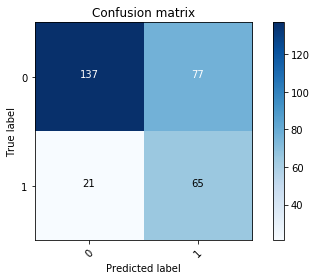

In [23]:
expected_L_ba = y_test
predicted_L_ba = logistic_clf_ba.predict(X_test)
confusion_mat_L_ba = metrics.confusion_matrix(expected_L_ba, predicted_L_ba)
plot_confusion_matrix(confusion_mat_L_ba, range(2))

In [24]:
t1 = confusion_mat_L_ba[0][0]/(confusion_mat_L_ba[0][0]+confusion_mat_L_ba[0][1])
t2 = confusion_mat_L_ba[1][1]/(confusion_mat_L_ba[1][1]+confusion_mat_L_ba[1][0])
print("Given good credit customer,prediction accuracy is {t1}".format(t1 =t1))
print("Given poor credit customer,prediction accuracy(Precision) is {t2}".format(t2 =t2))

Given good credit customer,prediction accuracy is 0.6401869158878505
Given poor credit customer,prediction accuracy(Precision) is 0.7558139534883721


**Conclusion: After assigning different weights({1:0.25,2:0.75}) to sample, I achieved a much better matrics.**
Of course, the price to that is sacrifice some of the accuracy

The overall acuuracy drops around 10 percents, but the accuracy for poor credit customer **increases over 23 percents.**

Accuracy of overall is **sacrificed for** accuracy for poor credit people!

**In this way, the unbalanced data problem is solved.**

# 4. Random Forest

### 4.1 Random Forest Pipeline

We no longer need to transform categorical data into dummy variables bacause no scale effects here. So slight changes are made here for previous pipelines.

In [25]:
from sklearn.ensemble import RandomForestClassifier

In [26]:
cat_pipeline_rf = Pipeline([
        ("select_cat", DataFrameSelector( cat_features )), #set the parameter for DataDrameSelector
        ("strtoint", strtoint()),         #set the parameter for SimpleImputer, Use median for the missing value
        #("todummy_drop",todummy_drop())
    ])

num_pipeline_rf = Pipeline([
        ("select_numeric", DataFrameSelector_toarray( num_features )), #set the parameter for DataDrameSelector
    ])

age_pipeline_rf = Pipeline([
        ("select_numeric", DataFrameSelector( features_age )), #set the parameter for DataDrameSelector
        ("Agebucket",  Age_bucket(n =10)),
        #(" todummy_drop",  todummy_drop())
  
    ])
    
preprocess_pipeline_rf = FeatureUnion(transformer_list=[
        ("num_pipeline", num_pipeline_rf),
        ("cat_pipeline", cat_pipeline_rf),
        ("age_pipeline", age_pipeline_rf)
    ])

In [27]:
X_2 = preprocess_pipeline_rf.fit_transform(data_train)
X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(X_2, y, test_size=0.3,random_state=1)

Transform age into 6.0 buckets and 5.0 dummy variables


### 4.2 Finding the optimal number and depth of trees using cross validation

In [28]:
def find_optimal_maxdep(X_train, y_train):
    res = []
    opt = 0
    for i in np.arange(1,20):
        rf = RandomForestClassifier(n_estimators=100, max_depth=i,random_state=1)
        SCORE = cross_val_score(rf, X_train_2, y_train_2, cv=5, scoring="accuracy")
        res.append(SCORE.mean())
    plt.plot(np.arange(1,20),res)
    return res

def find_optimal_nest(X_train_2, y_train_2):
    res = []
    for i in np.arange(1,500,5):
        rf = RandomForestClassifier(n_estimators=i, max_depth=7,random_state=1)
        SCORE = cross_val_score(rf, X_train_2, y_train_2, cv=5, scoring="accuracy")
        res.append(SCORE.mean())
    plt.plot(np.arange(1,500,5),res)
    return res

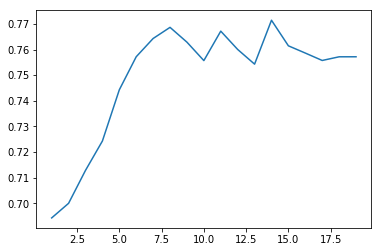

In [29]:
Score_rf_all =find_optimal_maxdep(X_train_2, y_train_2)

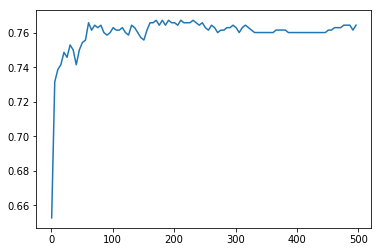

In [30]:
Score_rf_nest =find_optimal_nest(X_train_2, y_train_2)

After observation of the two graphes above, I decide to choose **100** for `n_estimators` and **7** for `max_depth`

### 4.3 Cross validation and prediction on testing set

In [31]:
rf_clf = RandomForestClassifier(n_estimators=100, max_depth=7,random_state=1)
SCORE_2 = cross_val_score(rf_clf, X_train, y_train, cv=5, scoring="accuracy")
SCORE_2 = SCORE_2.mean()
SCORE_2

0.7271475949939137

In [32]:
print("{s}: Accuracy = {a:.4f}".format(s="Random Forest Model  ", a=SCORE_2.mean()))

Random Forest Model  : Accuracy = 0.7271


In [33]:
expected_2 = y_train_2
predicted_2 = cross_val_predict(rf_clf, X_train_2, y_train_2, cv=5)
confusion_mat_rf_1 = metrics.confusion_matrix(expected_2, predicted_2)

Confusion matrix, without normalization


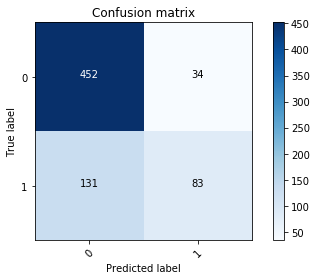

In [34]:
plot_confusion_matrix(confusion_mat_rf_1, range(2))

In [35]:
rf_clf_test = RandomForestClassifier(n_estimators=100, max_depth=7,random_state=1)
rf_clf_test.fit(X_train_2,y_train_2)
print("On the training set, the accuracy is {t:.4f}".format(t =rf_clf_test.score(X_train_2,y_train_2) ))
print("On the testing set, the accuracy is {t:.4f}".format(t = rf_clf_test.score(X_test_2,y_test_2)))

On the training set, the accuracy is 0.9029
On the testing set, the accuracy is 0.7500


In [36]:
t1 = confusion_mat_rf_1[0][0]/(confusion_mat_rf_1[0][0]+confusion_mat_rf_1[0][1])
t2 = confusion_mat_rf_1[1][1]/(confusion_mat_rf_1[1][1]+confusion_mat_rf_1[1][0])
print("Given good credit customer,prediction accuracy is {t1}".format(t1 =t1))
print("Given poor credit customer,prediction accuracy(Precision) is {t2}".format(t2 =t2))

Given good credit customer,prediction accuracy is 0.9300411522633745
Given poor credit customer,prediction accuracy(Precision) is 0.3878504672897196


**Comparison of Random Forest and Logistic Model**: 
- Accuracy: The accuracy in both models are similar. 
- Precision: As we can see in the confusion matrix. Random Forest has even **more serious problem predicting poor credit customers.(low precision)** 

### 4.4 Dealing with unbalanced data problem

I use the same weight as Logistic Model.

In [37]:
rf_clf_test_ba = RandomForestClassifier(n_estimators=100, max_depth=7,random_state=1,class_weight={1:0.25,2:0.75})
rf_clf_test_ba.fit(X_train_2,y_train_2)
rf_clf_test_ba.score(X_test_2,y_test_2)


0.75

In [38]:
expected_rf_ba = y_test_2
predicted_rf_ba = rf_clf_test_ba.predict(X_test_2)
confusion_mat_rf_ba = metrics.confusion_matrix(expected_rf_ba, predicted_rf_ba)

Confusion matrix, without normalization


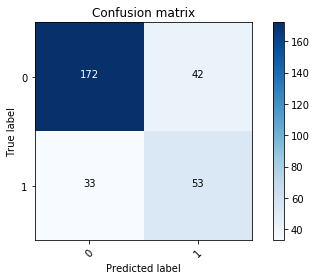

In [39]:
plot_confusion_matrix(confusion_mat_rf_ba, range(2))

In [40]:
t1 = confusion_mat_rf_ba[0][0]/(confusion_mat_rf_ba[0][0]+confusion_mat_rf_ba[0][1])
t2 = confusion_mat_rf_ba[1][1]/(confusion_mat_rf_ba[1][1]+confusion_mat_rf_ba[1][0])
print("Given good credit customer,prediction accuracy is {t1}".format(t1 =t1))
print("Given poor credit customer,prediction accuracy(Precision) is {t2}".format(t2 =t2))

Given good credit customer,prediction accuracy is 0.8037383177570093
Given poor credit customer,prediction accuracy(Precision) is 0.6162790697674418


Conclusion: Using the same weights in Logistic Model may not be enough in Random Forest. We actually here should change the weight into something with larger diference like {0:0.2,1:0.8} or {0:0.1,1:0.9}

### 4.5 Deciding the weights for Random Forest

To determine what the weight should be, we need to have another set to test the optimal weights.(Testing set should be used only once. If we now still use testing set and change weights, **We have already peeked on data!**

So the data set should be split into **three** from at the first place. Let's call them Train set, Test set and final set. **Test set** is used to determin the weights and **final set** is used to evluate the result.

In [41]:
X_train_3, X_test_3, y_train_3, y_test_3 = train_test_split(X_2, y, test_size=0.3,random_state=1)
X_test_3, X_final_3, y_test_3, y_final_3 = train_test_split(X_test_3, y_test_3, test_size=0.33333,random_state=1)

In [42]:
def precision_weights(X_train_2,y_train_2,X_test_2,y_test_2):
    score = []
    precision = []
    for i in np.arange(0,1,0.01):
        rf_clf_test_ba = RandomForestClassifier(n_estimators=170, max_depth=7,random_state=1,class_weight={1:i,2:1-i})
        rf_clf_test_ba.fit(X_train_2,y_train_2)
        score.append(rf_clf_test_ba.score(X_test_2,y_test_2))
        expected_rf_ba = y_test_2
        predicted_rf_ba = rf_clf_test_ba.predict(X_test_2)
        confusion_mat_rf_ba = metrics.confusion_matrix(expected_rf_ba, predicted_rf_ba)
        precision.append(confusion_mat_rf_ba[1][1]/(confusion_mat_rf_ba[1][1]+confusion_mat_rf_ba[1][0]))
    plt.plot(np.arange(0,1,0.01),score,label='Score')
    plt.plot(np.arange(0,1,0.01),precision,label='Precision')
    return [score, precision]

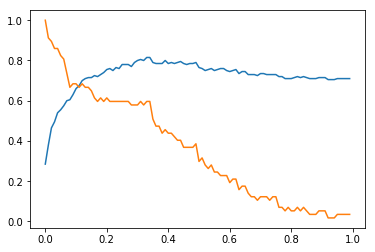

In [43]:
score,precision = precision_weights(X_train_3,y_train_3,X_test_3,y_test_3)

According to the graph above, weights of{1:0.1,2:0.9} is chosen

In [44]:
rf_clf_test_ba_2 = RandomForestClassifier(n_estimators=100, max_depth=7,random_state=1,class_weight={1:0.1,2:0.9})
rf_clf_test_ba_2.fit(X_train_3,y_train_3)
rf_clf_test_ba_2.score(X_final_3,y_final_3)

0.59

In [45]:
expected_rf_ba_2 = y_final_3
predicted_rf_ba_2 = rf_clf_test_ba.predict(X_final_3)
confusion_mat_rf_ba_2 = metrics.confusion_matrix(expected_rf_ba_2, predicted_rf_ba_2)

Confusion matrix, without normalization


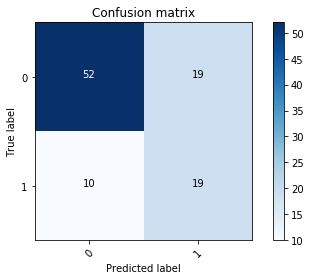

In [46]:
plot_confusion_matrix(confusion_mat_rf_ba_2, range(2))

In [47]:
t1 = confusion_mat_rf_ba_2[0][0]/(confusion_mat_rf_ba_2[0][0]+confusion_mat_rf_ba_2[0][1])
t2 = confusion_mat_rf_ba_2[1][1]/(confusion_mat_rf_ba_2[1][1]+confusion_mat_rf_ba_2[1][0])
print("Given good credit customer,prediction accuracy is {t1}".format(t1 =t1))
print("Given poor credit customer,prediction accuracy(Precision) is {t2}".format(t2 =t2))

Given good credit customer,prediction accuracy is 0.7323943661971831
Given poor credit customer,prediction accuracy(Precision) is 0.6551724137931034


# 5.  Summary

### 5.1 Accuracy Model

If we only evaluate the model by accuracy,`Logistic Model` without changing weight is a good choice

In [48]:
credit_model = logistic_clf_2

### 5.2 Balanced Model

In [49]:
credit_model_2 = rf_clf_test_ba

**Conclusion**: 
- In terms of unbalanced, Random Forest has more serious problem than Logistic Model. It seems that it is a must for Random Forest to address unbalanced data.
- Assigning different weights to the sample is really helpful if our goal is not soly on maximizing the accuracy but on both accuracy and percision.